In [3]:
import numpy as np
import librosa as lb
import matplotlib.pyplot as plt

In [4]:
class DelayLine():
    def __init__(self, buffer_size: int) -> None:
        self.buffer_size = buffer_size
        self.buffer = np.zeros(buffer_size, dtype=np.float64)
        self.ptr = 0
    
    def __read(self) -> float:
        return self.buffer[self.ptr]
    
    def __write(self, sample: float) -> None:
        self.buffer[self.ptr] = sample
        self.ptr += 1
        self.ptr %= self.buffer_size
    
    def teak(self, sample: float) -> float:
        delayed_sample = self.__read()
        self.__write(sample=sample)
        return delayed_sample

In [5]:
PATH = "suzanne.wav"
SR = 44100

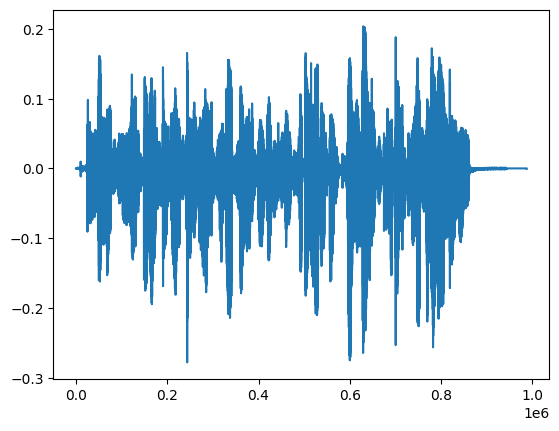

In [6]:
audio_data, _ = lb.load(PATH, sr=None)
plt.plot(audio_data)
plt.show()


In [16]:
delay_samples = SR
dl = DelayLine(buffer_size=delay_samples)

y = []

new_sample = 0.0
for sample in audio_data:
    new_sample = sample + 0.5 * dl.teak(sample=new_sample)
    y.append(new_sample)

 

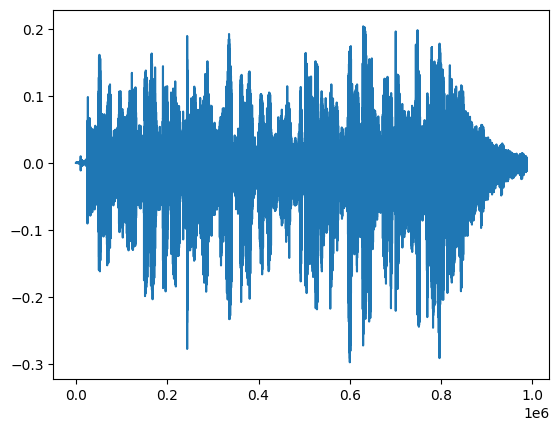

In [17]:
plt.plot(y)
plt.show()

In [18]:
from IPython.display import Audio

Audio(np.array(y), rate=SR)